# Applying Clustering Algorithms to Find Geographically Similar Headlines

In [1]:
from dataclasses import dataclass
import math
from pathlib import Path
from typing import List

import cartopy.crs as ccrs
from cartopy.feature import BORDERS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.cluster import DBSCAN, KMeans

This notebook uses `cartopy` to plot data onto maps instead of `basemap`, because `basemap` is now deprecated in favor of `cartopy`. Installation instructions for `cartopy` on macOS can be found in the README at the root directory of this notebook.

## Load headlines with geographical data from parquet file

In [2]:
geo_headlines = pd.read_parquet(Path("data/processed/headlines-with-geo.parquet"))
geo_headlines.head()

,headline,city,latitude,longitude,countrycode
0,Case of Hepatitis A Reported in Calgary,Calgary,51.05011,-114.08529,CA
1,More people in Nadi are infected with HIV ever...,Nadi,-17.80309,177.41617,FJ
2,Lower Hospitalization in Janesville after Vari...,Janesville,42.68279,-89.01872,US
3,Contaminated Meat Brings Trouble for Bonn Farmers,Bonn,50.73438,7.09549,DE
4,Molo Cholera Spread Causing Concern,Molo,-0.24849,35.73194,KE


As a quick check, lets plot the latitude and longitude columns.

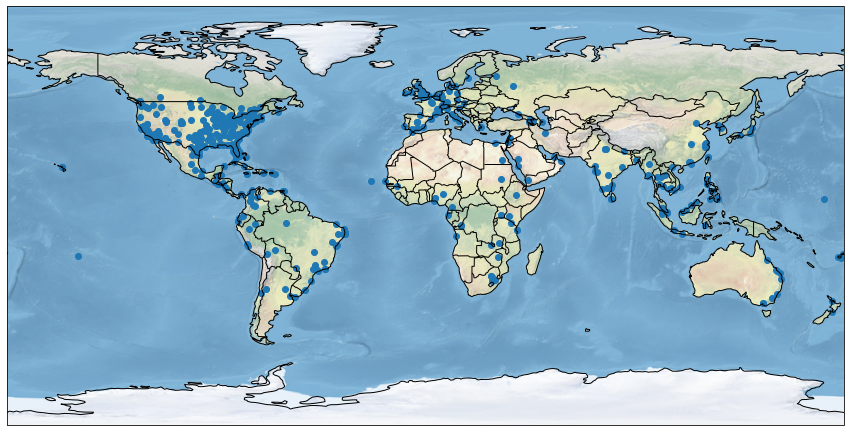

In [3]:
coordinates = geo_headlines[["latitude", "longitude"]]

plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
ax.add_feature(BORDERS)

plt.scatter(
    coordinates.longitude,
    coordinates.latitude,
    marker="o",
    transform=ccrs.PlateCarree(),
)

plt.show()

## KMeans

First we will use an elbow plot to select the number of clusters to use in k-means. We will do a search over 1 to 10 clusters and plot the inertia values.

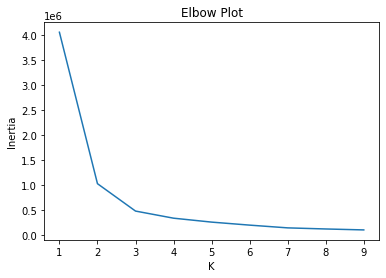

In [4]:
k_values = range(1, 10)
inertia_values = [KMeans(k).fit(coordinates).inertia_ for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Plot")
plt.show()

It looks like the elbow bends at k=3.

In [5]:
N_CLUSTERS = 3
kmeans_model = KMeans(n_clusters=N_CLUSTERS)
kmeans_assigned_clusters = kmeans_model.fit_predict(coordinates)
kmeans_assigned_clusters

array([0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0,

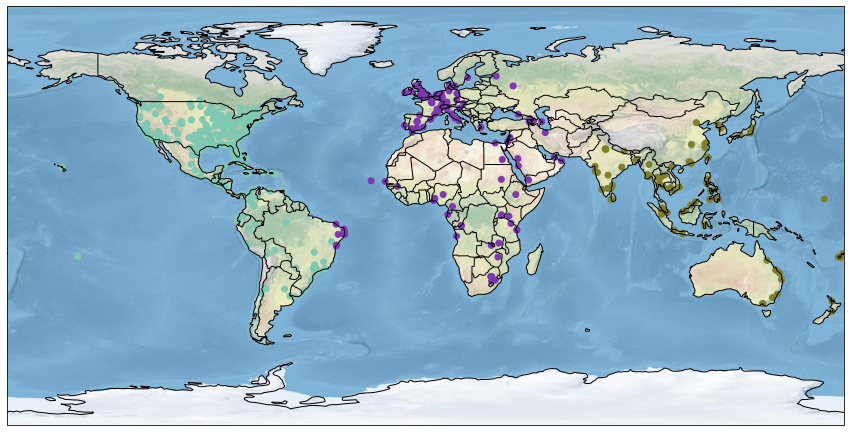

In [6]:
plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
ax.add_feature(BORDERS)

colors_3 = ["#7fc8b1", "#7f7f2c", "#7f36b1"]
kmeans_colors = [colors_3[cluster] for cluster in kmeans_assigned_clusters]

plt.scatter(
    coordinates.longitude,
    coordinates.latitude,
    color=kmeans_colors,
    marker="o",
    transform=ccrs.PlateCarree(),
)

plt.show()

In [7]:
geo_headlines["kmeans_cluster"] = kmeans_assigned_clusters
geo_headlines

,headline,city,latitude,longitude,countrycode,kmeans_cluster
0,Case of Hepatitis A Reported in Calgary,Calgary,51.05011,-114.08529,CA,0
1,More people in Nadi are infected with HIV ever...,Nadi,-17.80309,177.41617,FJ,1
2,Lower Hospitalization in Janesville after Vari...,Janesville,42.68279,-89.01872,US,0
3,Contaminated Meat Brings Trouble for Bonn Farmers,Bonn,50.73438,7.09549,DE,2
4,Molo Cholera Spread Causing Concern,Molo,-0.24849,35.73194,KE,2
...,...,...,...,...,...,...
603,Lower Hospitalization in Lakewood after Hepati...,Lakewood,39.70471,-105.08137,US,0
604,More Patients in Canton are Getting Diagnosed ...,Canton,42.30865,-83.48216,US,0
605,Zika case confirmed in Lorain,Lorain,41.45282,-82.18237,US,0
606,Hepatitis E Hits Hammond,Hammond,41.58337,-87.50004,US,0


## DBSCAN

First let us define the `haversine_distance` metric so that we can use it when clustering with DBSCAN.

In [8]:
def haversine_distance(a: List[float], b: List[float]) -> float:
    """Calculates the haversine (great circle) distance between two points, a
    and b. Unfortunately, these points are Lists of floats because this is
    the loosy-goosy convention that the scikit-learn haversine distance
    function uses.

    Args:
        a (List[float]): 2 element list containing [latitude, longitude] in
            radians.
        b (List[float]): 2 element list containing [latitude, longitude] in
            radians.

    Returns:
        float: Distance between a and b in kilometers.
    """
    R = 6371000  # Radius of Earth in meters
    R_km = R / 1000
    distance_matrix = sklearn.metrics.pairwise.haversine_distances([a, b])

    # The distance matrix is defined as a 2x2 matrix with all pairwise
    # distances. Since the distance from a to a is 0, and the distance from a
    # to b is equal to the distance from b to a, we simply return the first
    # non-zero entry.
    return distance_matrix[0, 1] * R_km

Since I do not have much experience tuning hyperparameters for the DBSCAN algorithm, I will simply cluster using the hyperparameters of `min_samples=3` and `eps=402.336`, as recommended. Note that 402.336 km = 250 mi.

In [9]:
radian_latitude_longitude = (
    coordinates[["latitude", "longitude"]].applymap(math.radians).to_numpy()
)
radian_latitude_longitude

array([[ 0.8909925 , -1.99116394],
       [-0.31072254,  3.09649631],
       [ 0.74495522, -1.55366976],
       ...,
       [ 0.72348819, -1.43435294],
       [ 0.72576672, -1.52716379],
       [ 0.57217234, -1.68959513]])

In [10]:
dbscan_model = DBSCAN(eps=402.336, min_samples=3, metric=haversine_distance)
dbscan_assigned_cluster = dbscan_model.fit_predict(radian_latitude_longitude)
dbscan_assigned_cluster

array([-1,  0,  1,  2,  3, -1, -1,  4,  1,  1,  1,  1, 13,  1,  2,  5,  2,
        5,  1,  1,  1,  1,  1,  6,  5,  5,  7, -1, -1, 33,  1,  8,  2,  1,
        1,  2,  2,  5,  9, 10,  2,  1,  1,  1,  1,  2,  1,  2,  5,  5, 10,
        1, 11,  1,  1,  1,  5,  5,  1,  1, -1,  2,  2,  1, 12, 13, 13, 13,
        1,  1,  1,  1, -1, 14,  1,  5,  2,  5,  9,  5,  1, -1,  1, 15,  1,
        5,  1, 14,  1,  2,  1,  1,  1, -1, -1, -1, -1, -1, 16,  1,  1,  1,
        1,  2,  1,  1, -1,  1, 10, 11,  1, 17, 11,  6, -1,  1,  1,  1, -1,
       -1,  0,  2,  2,  1, 14,  1,  5,  1,  1,  1,  4,  5,  2, -1, 13, 18,
       14,  1,  1, 19,  1, -1,  1, 20, -1, -1, 11, -1,  1, -1, 30,  4,  1,
       -1,  1,  1, -1,  2, 28,  2, -1,  1,  1,  1,  2,  2,  1, 14, 11,  1,
        1,  1, 21,  1,  2,  1,  2,  2,  2,  6,  6, -1, -1,  1, -1,  1,  1,
        4, 20,  5,  3,  5,  1, -1,  1,  1,  1, 22,  1,  1,  1, -1,  6, -1,
        1,  1,  1, 23, 23,  1, 24,  2,  7,  5, -1, 25,  1,  4,  1,  1,  1,
        2,  8,  1, -1,  2

In [11]:
len(set(dbscan_assigned_cluster))

36

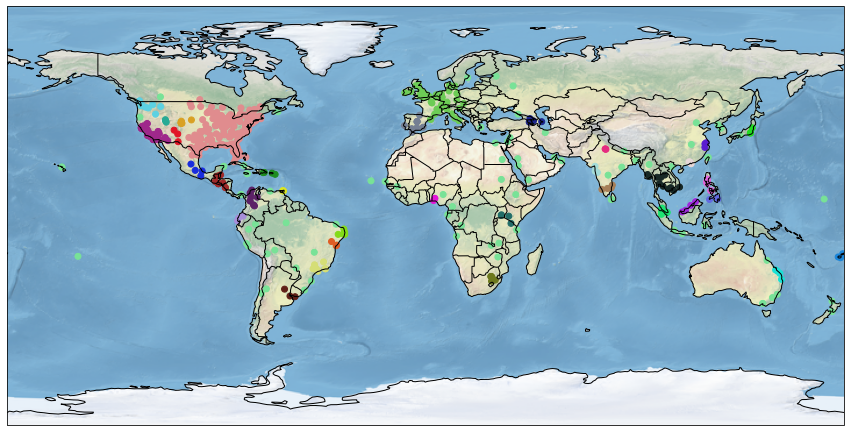

In [12]:
colors_36 = [
    "#1b85d9",
    "#e08c8e",
    "#6ccc55",
    "#226d68",
    "#a02a2a",
    "#9f288b",
    "#5cd1e2",
    "#dbe622",
    "#5a1bd1",
    "#a4dcd8",
    "#182826",
    "#e367dd",
    "#a67f58",
    "#747e92",
    "#d5de76",
    "#5c2267",
    "#df5e25",
    "#1ee372",
    "#d9a123",
    "#a78ed9",
    "#83db18",
    "#27aa95",
    "#9f28de",
    "#e316d7",
    "#1c268d",
    "#e52c7f",
    "#626ae1",
    "#e7d7d7",
    "#182cde",
    "#6d791e",
    "#5f1f17",
    "#1ae1d6",
    "#1e8c21",
    "#e11626",
    "#21dd21",
    "#78e297",
]
dbscan_colors = [colors_36[cluster] for cluster in dbscan_assigned_cluster]

plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
ax.add_feature(BORDERS)

plt.scatter(
    coordinates.longitude,
    coordinates.latitude,
    color=dbscan_colors,
    transform=ccrs.PlateCarree(),
)
plt.show()

In [13]:
geo_headlines["dbscan_cluster"] = dbscan_assigned_cluster
geo_headlines

,headline,city,latitude,longitude,countrycode,kmeans_cluster,dbscan_cluster
0,Case of Hepatitis A Reported in Calgary,Calgary,51.05011,-114.08529,CA,0,-1
1,More people in Nadi are infected with HIV ever...,Nadi,-17.80309,177.41617,FJ,1,0
2,Lower Hospitalization in Janesville after Vari...,Janesville,42.68279,-89.01872,US,0,1
3,Contaminated Meat Brings Trouble for Bonn Farmers,Bonn,50.73438,7.09549,DE,2,2
4,Molo Cholera Spread Causing Concern,Molo,-0.24849,35.73194,KE,2,3
...,...,...,...,...,...,...,...
603,Lower Hospitalization in Lakewood after Hepati...,Lakewood,39.70471,-105.08137,US,0,18
604,More Patients in Canton are Getting Diagnosed ...,Canton,42.30865,-83.48216,US,0,1
605,Zika case confirmed in Lorain,Lorain,41.45282,-82.18237,US,0,1
606,Hepatitis E Hits Hammond,Hammond,41.58337,-87.50004,US,0,1
